<a href="https://colab.research.google.com/github/abdelrahmanEmad5005/LGMVIP-DataScience-Task-3/blob/main/Prediction_Using_Decision_Tree_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Importing Libraries And Read Data**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", color_codes=True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
iris_data = pd.read_csv("/content/drive/MyDrive/Datasets/iris.data",header=None)

In [ ]:
feature_names = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']
iris_data.columns = feature_names

##Exploring The Data

In [ ]:
iris_data.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


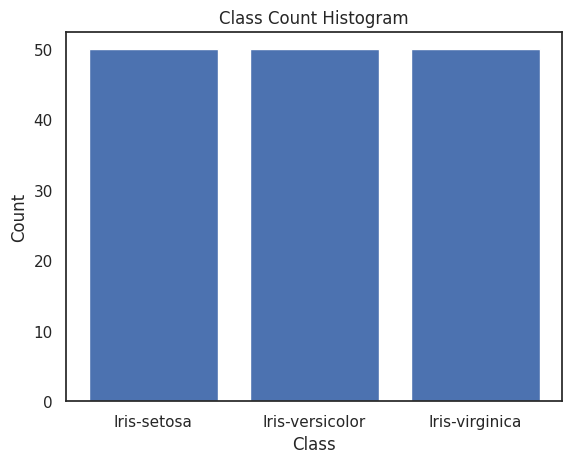

In [ ]:
class_counts = iris_data["class"].value_counts()
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Count Histogram')
plt.show()

In [ ]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
iris_data.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


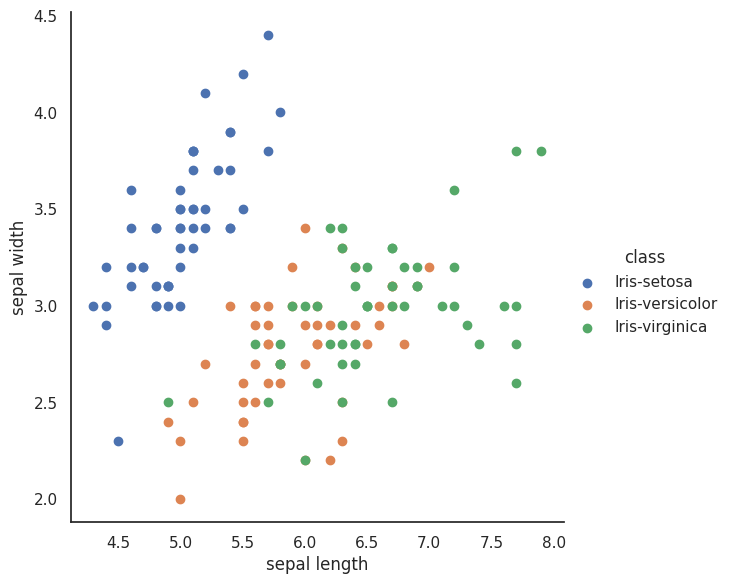

In [ ]:
sns.FacetGrid(iris_data, hue="class", height=6).map(plt.scatter, "sepal length", "sepal width").add_legend()

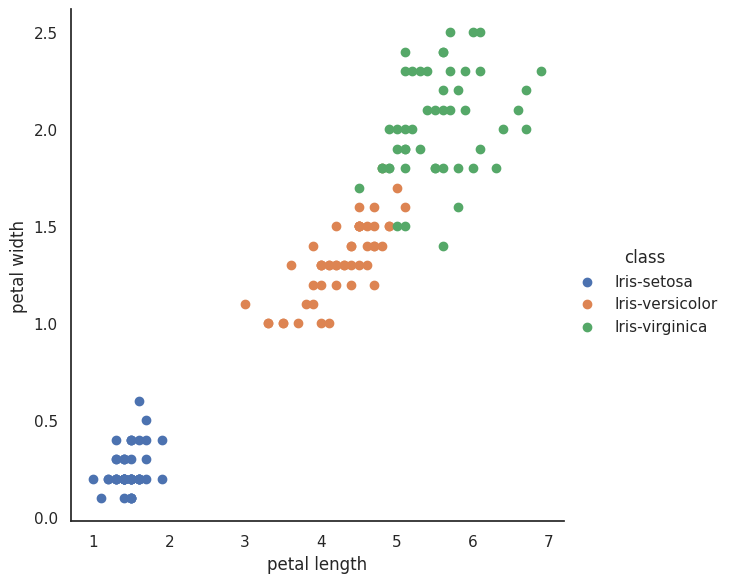

In [ ]:
sns.FacetGrid(iris_data, hue="class", height=6).map(plt.scatter, "petal length", "petal width").add_legend()

##**Prepare Features And Target**

In [ ]:
X = iris_data.drop(["class"], axis=1)
y = iris_data[["class"]]

In [ ]:
X.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y.head()

,class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
ordinal_encoder = OrdinalEncoder()
y_encoded = ordinal_encoder.fit_transform(y)

In [ ]:
print(y_encoded[:5])
print(y_encoded[50:55])
print(y_encoded[100:105])

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]]
[[2.]
 [2.]
 [2.]
 [2.]
 [2.]]


In [ ]:
ordinal_encoder.categories_

[array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, shuffle=True, test_size=0.30, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y_encoded)

DecisionTreeClassifier(max_depth=2, random_state=42)